# 3. Multiple Regression Analysis: Estimation

## 3.1 Multiple Regression in Practice

|Y|X|
|---|---|
|Dependent variable|Independent variable|
|Explained variable|Explanatory variable|
|Response variable|Control variable|
|Predicted variable|Predictor variable|
|Regressand|Regressor|

#### <center>Table 2.1 Terminology for Simple Regression</center>

### OLS First Order Conditions

$\sum_{i=1}^{n}{(y_i-\hat{\beta_0}-\hat{\beta_1}x_{i1} -...- \hat{\beta_k}x_{ik})}=0$

$x_{i1}\sum_{i=1}^{n}{(y_i-\hat{\beta_0}-\hat{\beta_1}x_{i1} -...- \hat{\beta_k}x_{ik})}=0$

$x_{i2}\sum_{i=1}^{n}{(y_i-\hat{\beta_0}-\hat{\beta_1}x_{i1} -...- \hat{\beta_k}x_{ik})}=0$

...

$x_{ik}\sum_{i=1}^{n}{(y_i-\hat{\beta_0}-\hat{\beta_1}x_{i1} -...- \hat{\beta_k}x_{ik})}=0$

### Example 3.1: Determinants of College GPA


In [1]:
import wooldridge as woo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.stats.outliers_influence as smo
import patsy as pt


#pingouin is not used in the text, but will be useful
#  for considering omitted variable bias
import pingouin

# Functions that we build in previous chapters are saved in supplementary Functions
# Sometimes we will reconstruct and augment a past function. We will save the
#  more advanced functions in this file
from supplementaryFunctions import *

In [2]:
gpa1 = woo.dataWoo("gpa1")
names = ["colGPA", "hsGPA", "ACT"]
data = gpa1[names]

X, y = build_X_y_matrices(data, names)

reg = sm.OLS(y, X)
results = reg.fit()

In [3]:
OLS_summary(results)

$\beta $     $t$  $$P>|t|$$    $SE$
$$r^2: 0.1764$$                                     
hsGPA              0.4535  4.7327     0.0000  0.0958
ACT                0.0094  0.8746     0.3833  0.0108
Intercept          1.2863  3.7742     0.0002  0.3408

In [4]:
# rebuild to use attributes from results
def build_estimator(data, results, y_name):
    data["$$\widehat{" + y_name + "}$$"] = results.fittedvalues
    data["$$\hat{u}$$"] = results.resid
    
    return data
y_name = names[0]
data = build_estimator(data, results, y_name)
data

C:\Users\JLCat\AppData\Local\Temp\ipykernel_13768\3766457168.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["$$\widehat{" + y_name + "}$$"] = results.fittedvalues
C:\Users\JLCat\AppData\Local\Temp\ipykernel_13768\3766457168.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["$$\hat{u}$$"] = results.resid


colGPA  hsGPA  ACT  $$\widehat{colGPA}$$  $$\hat{u}$$
0       3.0    3.0   21              2.844642     0.155358
1       3.4    3.2   24              2.963611     0.436389
2       3.0    3.6   26              3.163845    -0.163845
3       3.5    3.5   27              3.127926     0.372074
4       3.6    3.9   28              3.318734     0.281266
..      ...    ...  ...                   ...          ...
136     3.0    3.3   23              2.999530     0.000470
137     2.3    3.6   25              3.154419    -0.854419
138     2.8    3.4   21              3.026024    -0.226024
139     3.4    3.7   26              3.209191     0.190809
140     2.8    3.3   28              3.046661    -0.246661

[141 rows x 5 columns]

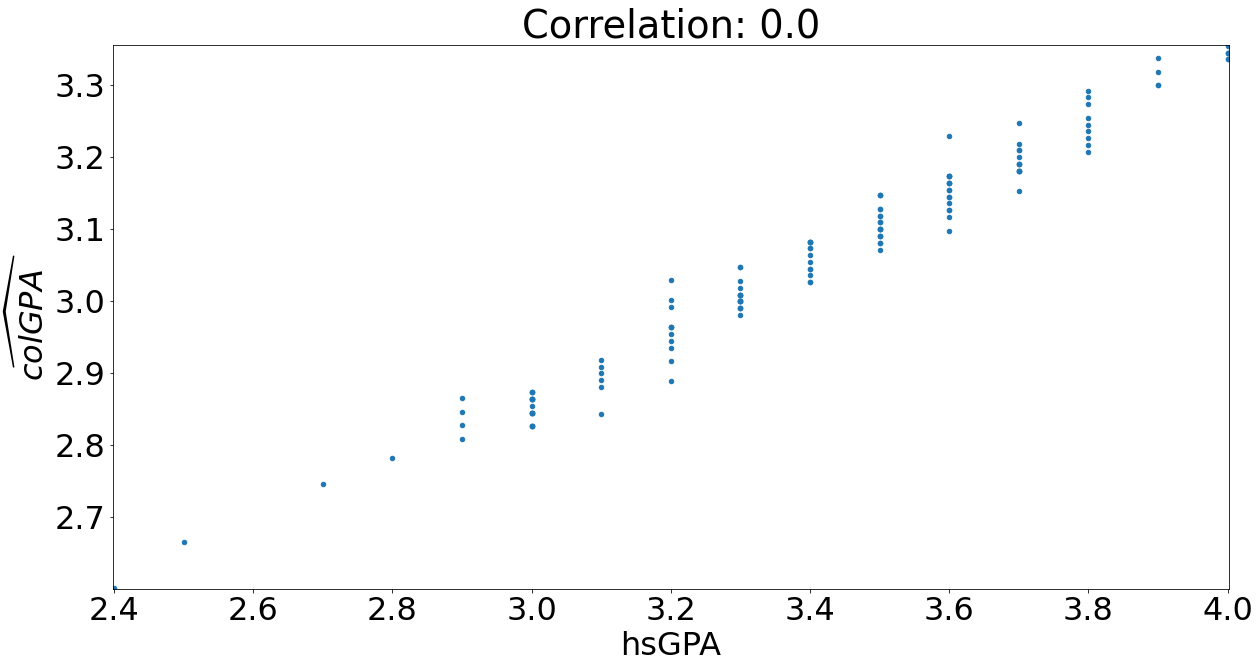

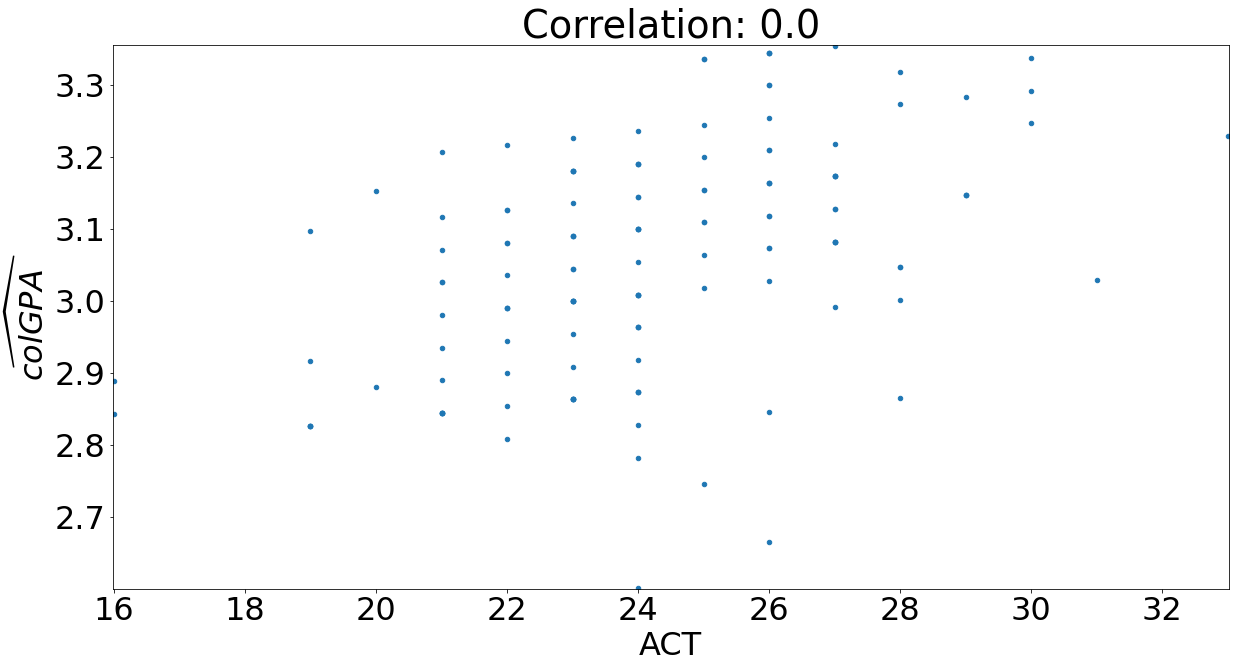

In [5]:
plt.rcParams['axes.xmargin'] = 0.001
plt.rcParams['axes.ymargin'] = 0.001
plt.rcParams.update({"font.size":32})
        
plot_errors(data)

### Example 3.2

In [6]:
wage1 = woo.dataWoo("wage1")
names = ["wage", "educ", "exper", "tenure"]
log_vars = ["wage"]
data = wage1[names]
X, y = build_X_y_matrices(data, names, log_vars = log_vars)


reg = sm.OLS(y, X)
results = reg.fit()
OLS_summary(results)

C:\Users\JLCat\GithubRepositories\OtherRepositories\Wooldridge\supplementaryFunctions.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[name] = np.log(data[name])


$\beta $      $t$  $$P>|t|$$    $SE$
$$r^2: 0.316$$                                      
educ              0.0920  12.5552     0.0000  0.0073
exper             0.0041   2.3914     0.0171  0.0017
tenure            0.0221   7.1331     0.0000  0.0031
Intercept         0.2844   2.7292     0.0066  0.1042

C:\Users\JLCat\AppData\Local\Temp\ipykernel_13768\3766457168.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["$$\widehat{" + y_name + "}$$"] = results.fittedvalues
C:\Users\JLCat\AppData\Local\Temp\ipykernel_13768\3766457168.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["$$\hat{u}$$"] = results.resid


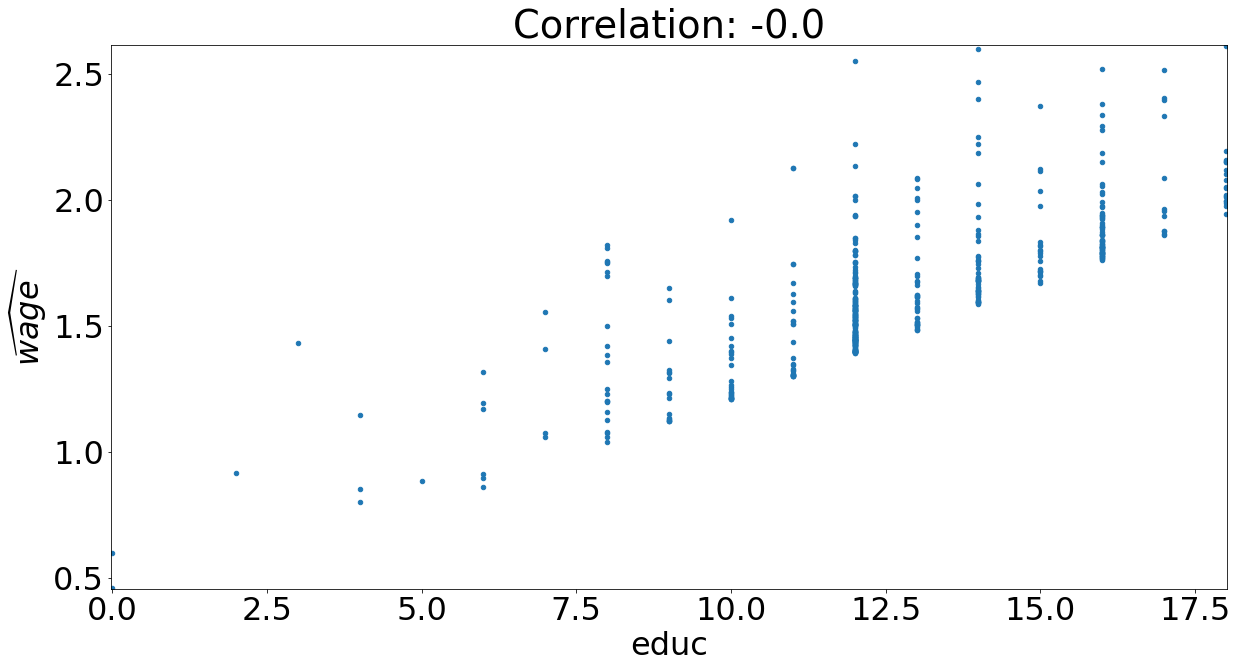

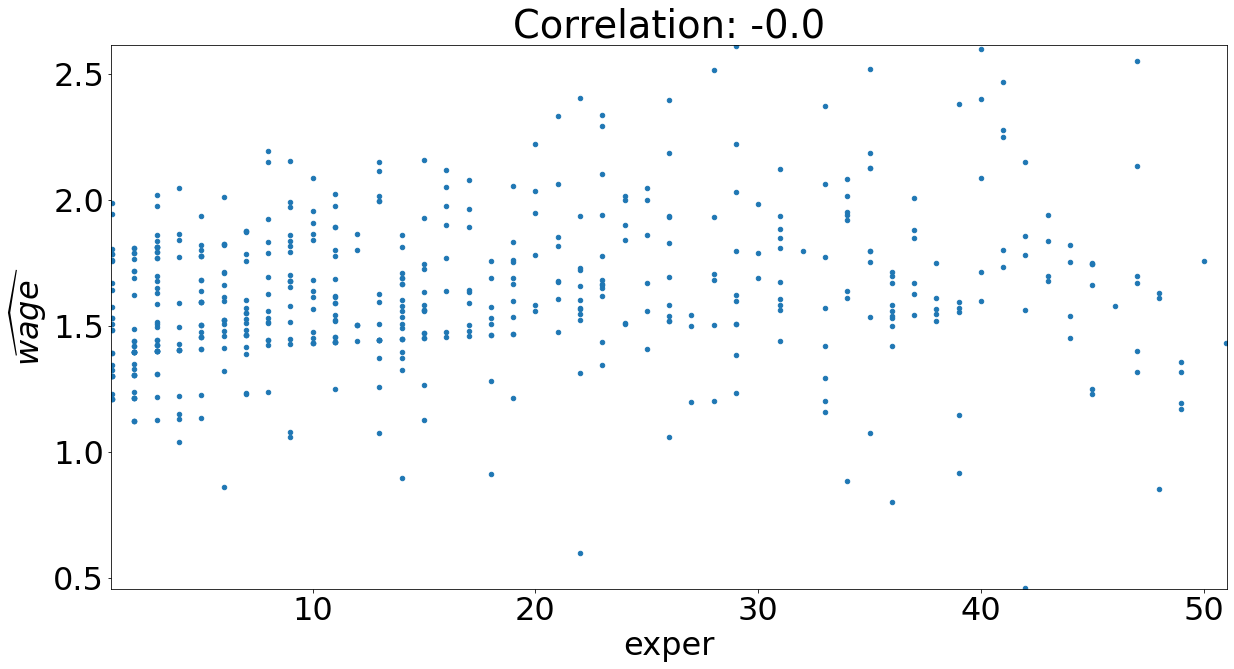

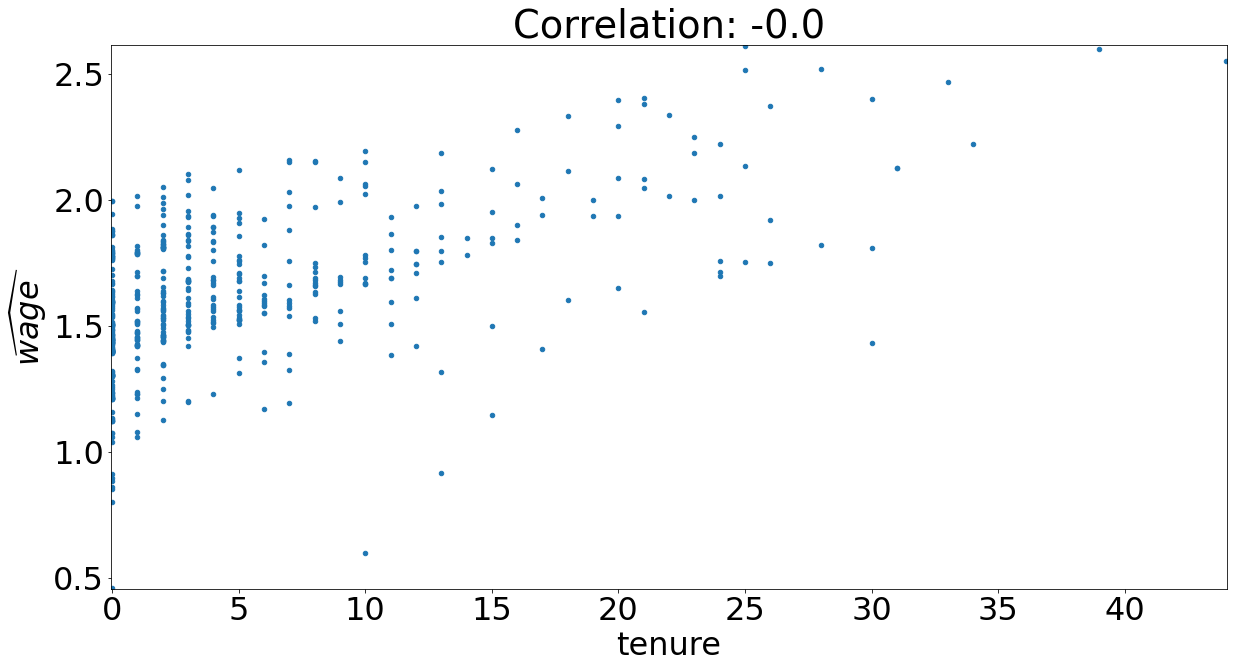

In [7]:
y_name = names[0]
build_estimator(data, results, y_name)
plot_errors(data)

### Example 3.3

In [8]:
k401k = woo.dataWoo("401k")
names = ["prate", "mrate"]
# Run simple regression that excludes age as variable in X
data = k401k[names]
X, y = build_X_y_matrices(data, names)


reg = sm.OLS(y, X)
results = reg.fit()
OLS_summary(results)

$\beta $       $t$  $$P>|t|$$    $SE$
$$r^2: 0.0747$$                                       
mrate              5.8611   11.1214        0.0  0.5270
Intercept         83.0755  147.4840        0.0  0.5633

C:\Users\JLCat\AppData\Local\Temp\ipykernel_13768\3766457168.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["$$\widehat{" + y_name + "}$$"] = results.fittedvalues
C:\Users\JLCat\AppData\Local\Temp\ipykernel_13768\3766457168.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["$$\hat{u}$$"] = results.resid


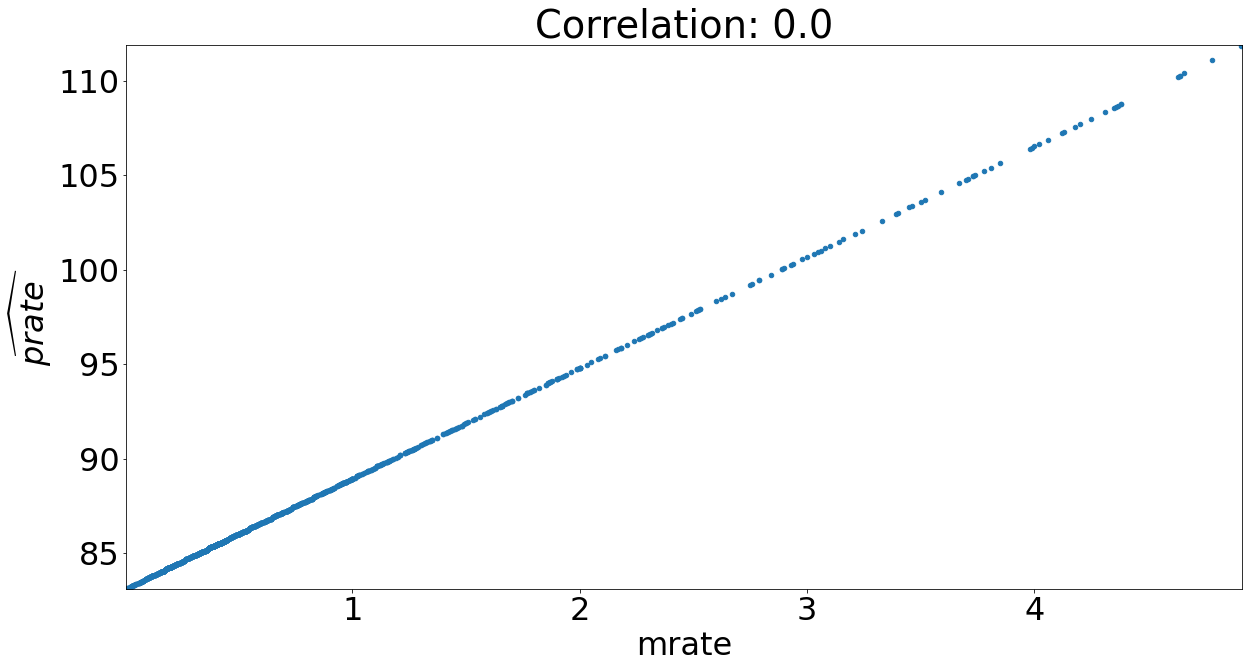

In [9]:
y_name = names[0]
build_estimator(data, results, y_name)
plot_errors(data)

The goodness of fit increases modestly and the estimation of the marginal impact of mrate on prate fall modestly with the addition of age. The errors are heteroskedastic _and_ normally distributed across values of X. This is a violation of MLR.5 and MLR.6 (Chapter 4) since the change in mean also impacts the values of the error term.

In [10]:
names = ["prate", "mrate", "age"]

data = k401k[names]
X, y = build_X_y_matrices(data, names)

reg = sm.OLS(y, X)
results = reg.fit()
OLS_summary(results)

$\beta $       $t$  $$P>|t|$$    $SE$
$$r^2: 0.0922$$                                       
mrate              5.5213   10.4991        0.0  0.5259
age                0.2431    5.4395        0.0  0.0447
Intercept         80.1190  102.8458        0.0  0.7790

C:\Users\JLCat\AppData\Local\Temp\ipykernel_13768\3766457168.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["$$\widehat{" + y_name + "}$$"] = results.fittedvalues
C:\Users\JLCat\AppData\Local\Temp\ipykernel_13768\3766457168.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["$$\hat{u}$$"] = results.resid


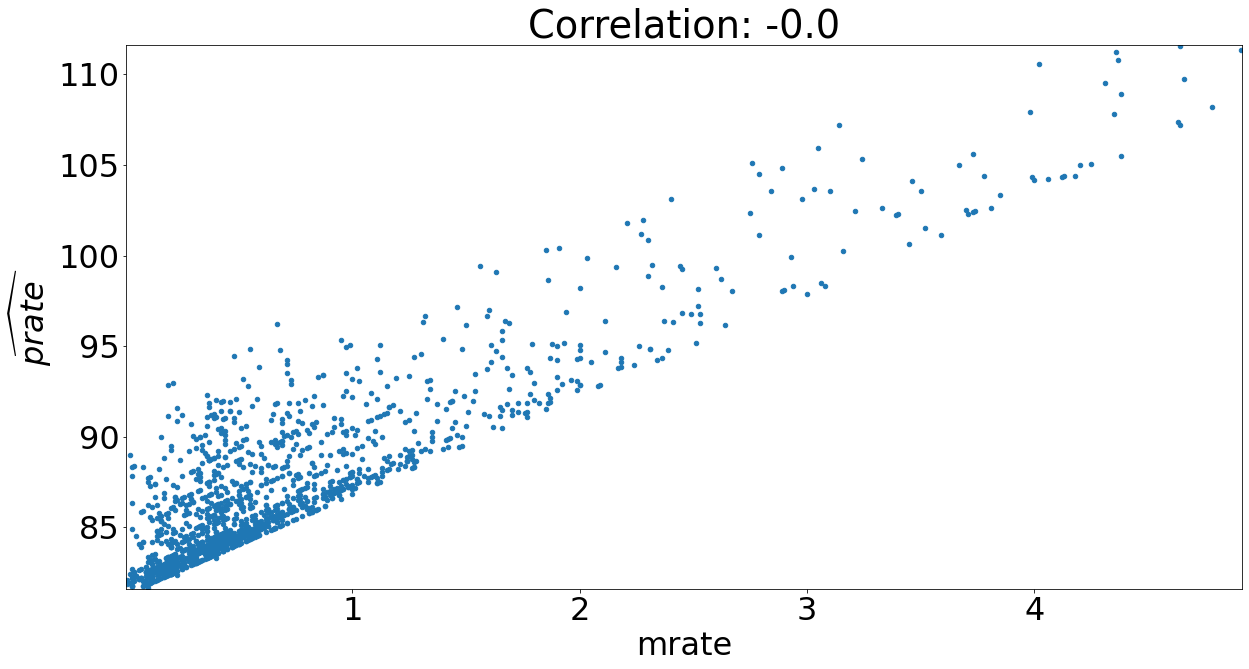

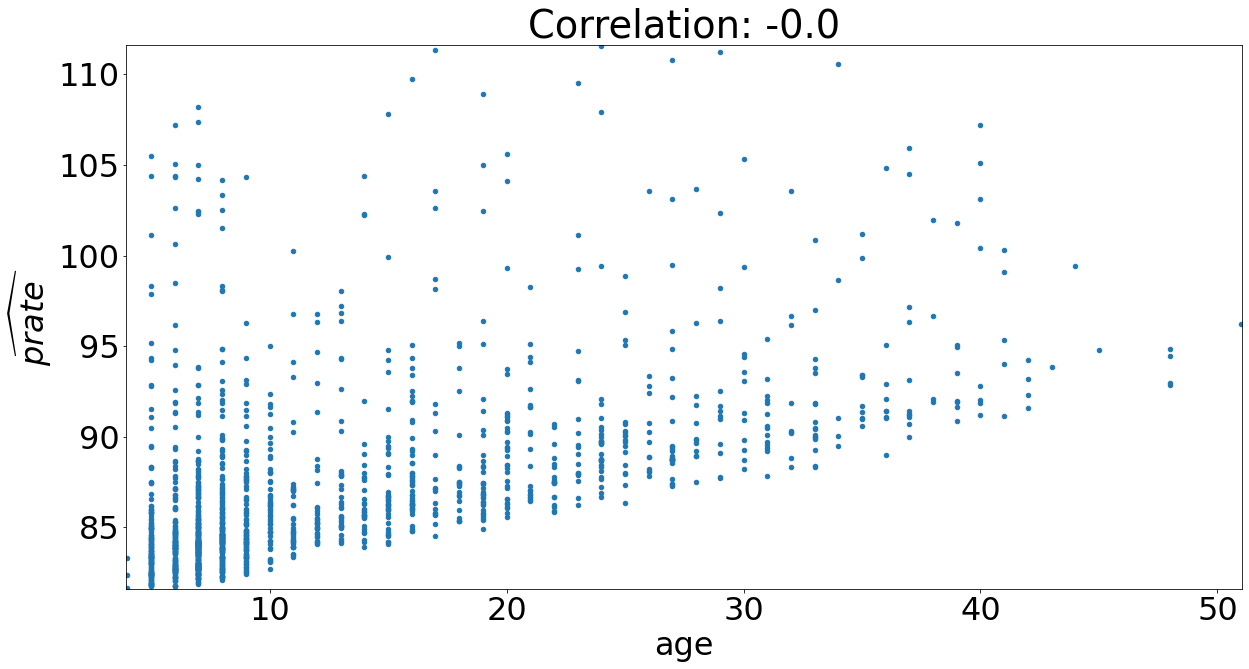

In [11]:
y_name, x_names = names[0], names[1:]
build_estimator(data, results, y_name)
plot_errors(data)

While the correlation between the X-variables and the error term is 0, it is not constant across x values. Let's investigate this a couple ways. First, we will take mean values grouped by values of the x-variales.

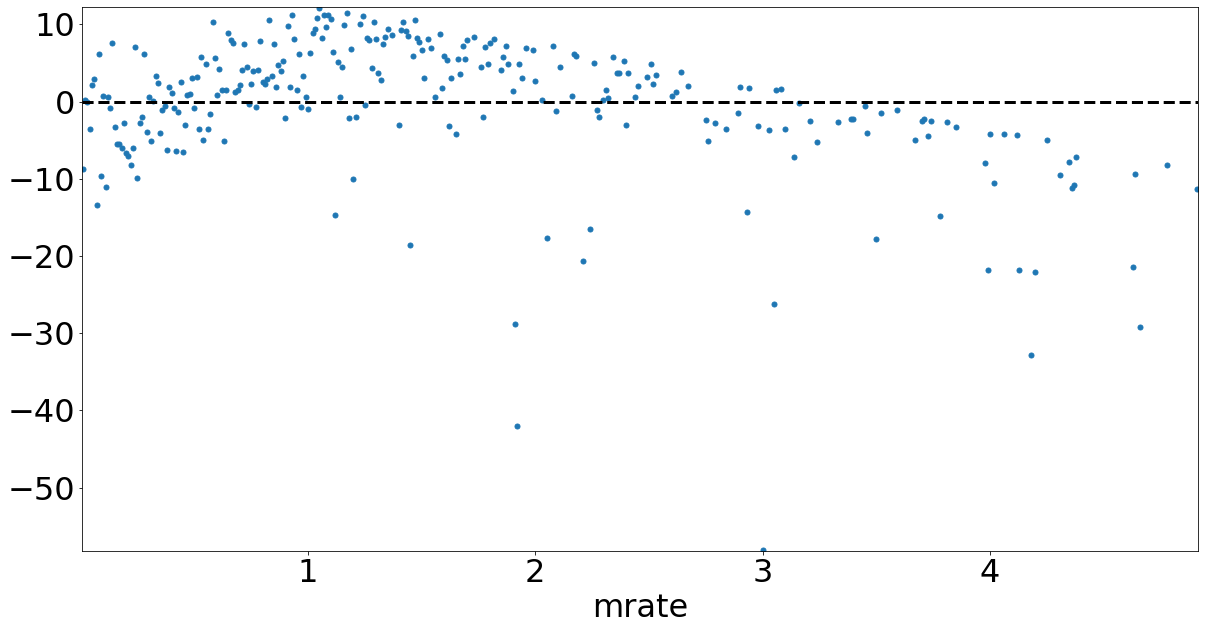

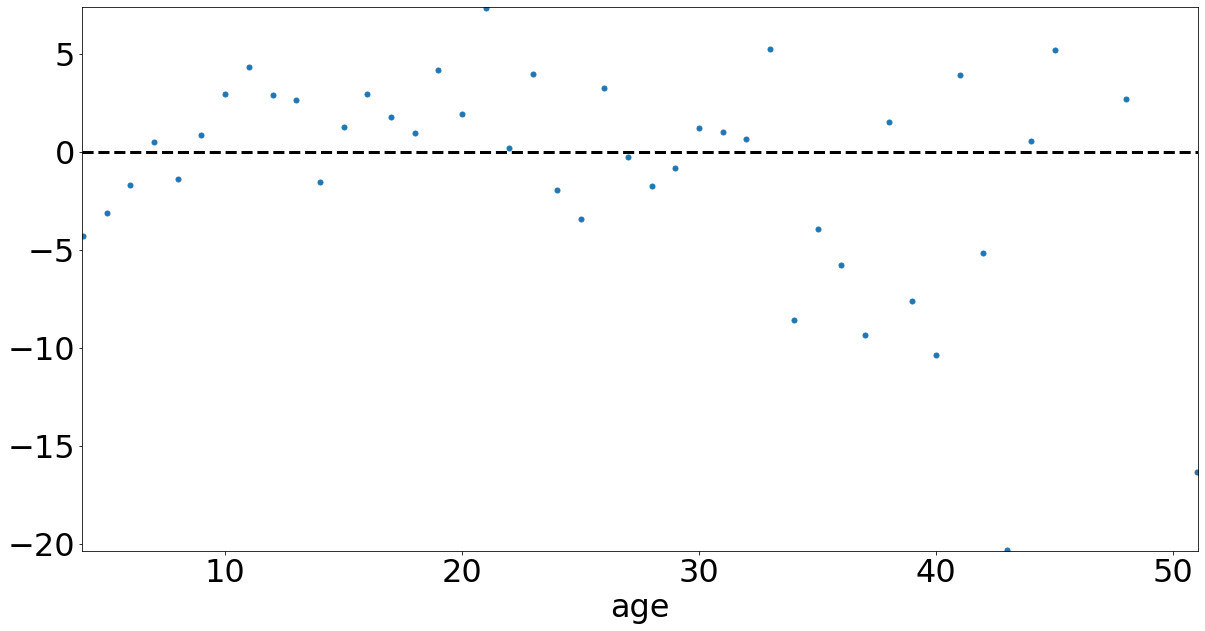

In [12]:
for x_name in x_names:
    fig, ax = plt.subplots(figsize = (20,10))
    data.groupby(x_name).mean()["$$\hat{u}$$"].plot(ls = "", marker = ".",markersize = 10, ax = ax)
    ax.axhline(0, ls = "--", linewidth = 3, color = "k")

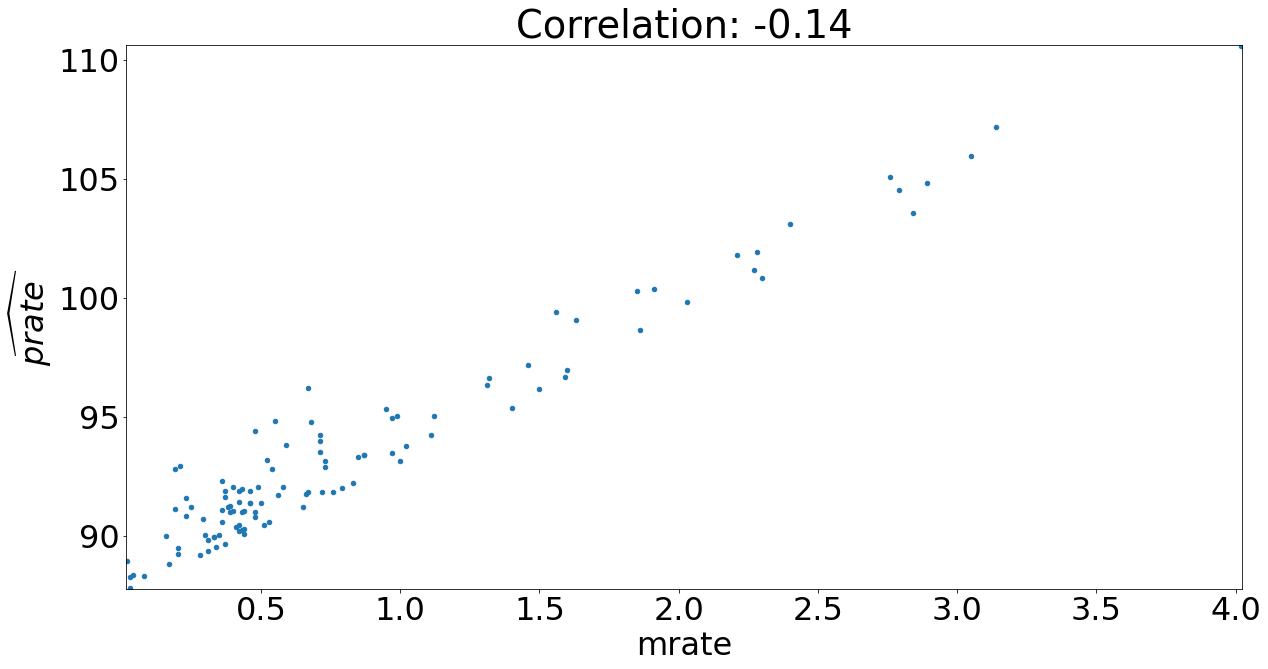

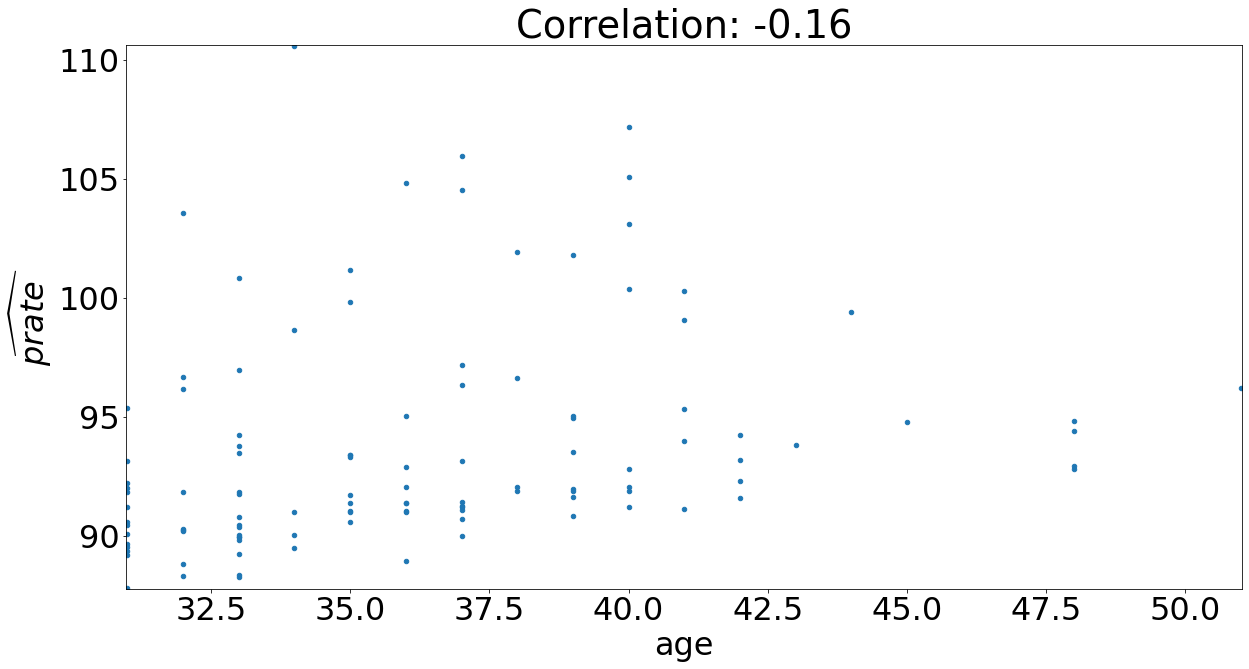

In [13]:
plot_errors(data[data["age"]>30])

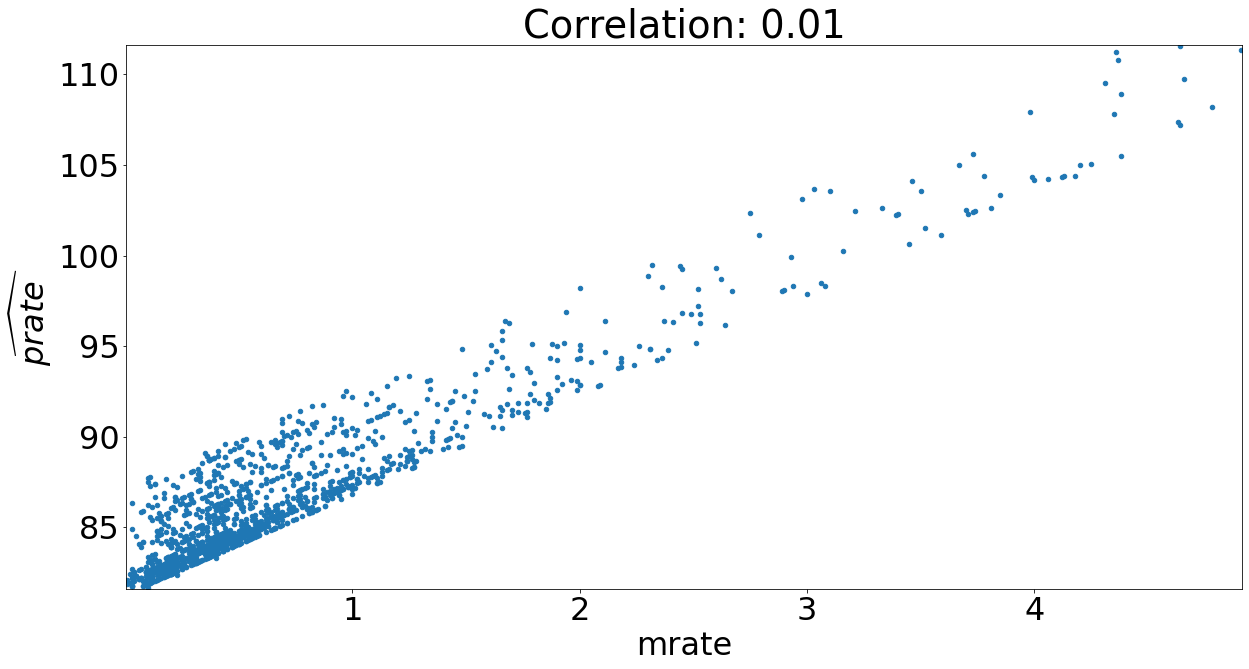

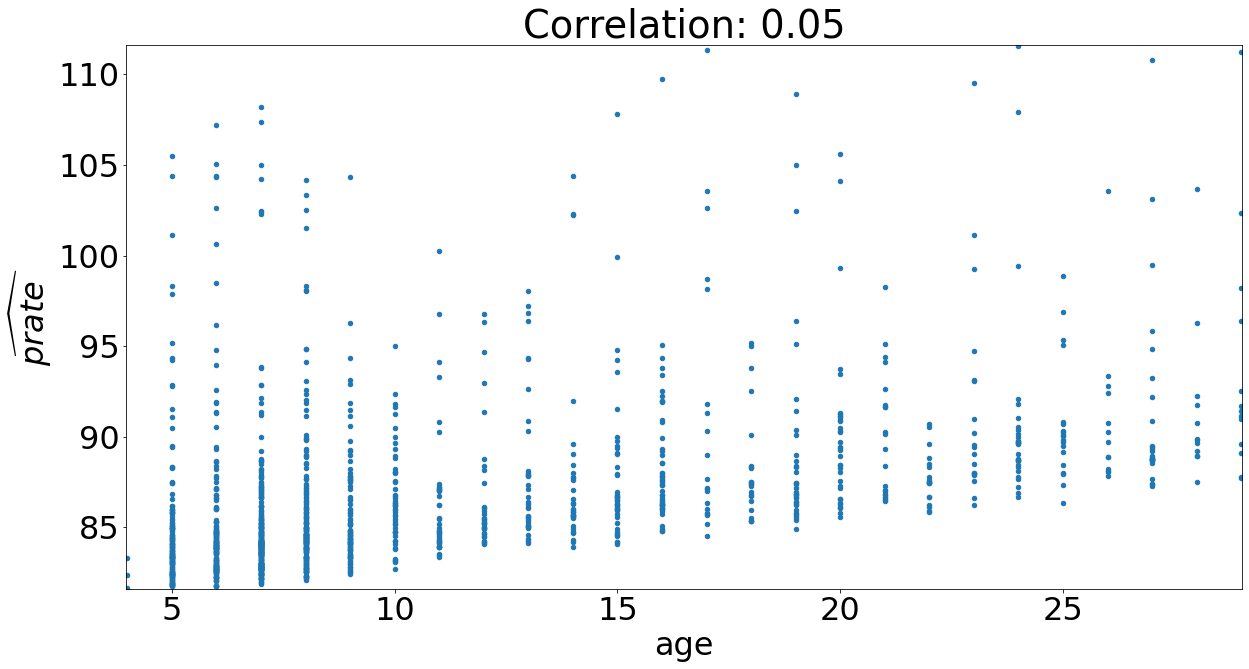

In [14]:
plot_errors(data[data["age"]<30])

### Goodness-of-Fit

## $SST = \sum_{i=0}^{n} (y_{i} - y ̅ _{i})^2$

## $SSE = \sum_{i=0}^{n} (y_{i} - y ̂ _{i})^2$

## $SSR = \sum_{i=0}^{n} (y ̂ _{i} - y ̅ )^2$

## $SST=SSE+SSR$

#### $R^2$ is the fraction of explained variance divided by total variance. The sum of the percentage of explained variance ($SSE$) and unexplained variance ($SSR$) is equal to 100%, or in other words, 1.0.

## $\frac{SSR}{SST}+\frac{SSE}{SST}=1$

## $R^2 = \frac{SSE}{SST} = 1 - \frac{SSR}{SST}$

#### $R^2$ is also defined as the correlation of the estimator $\hat{y}$ and the observerations of the dependent variable, $y$

## $R^2=\frac{(\sum_{i=1}^{n}{(y_i - \bar{y})(\hat{y}-\bar{\hat{y}})})^2}{(\sum_{i=1}^{n}{(y_i - \bar{y})^2})(\sum_{i=1}^{n}{(\hat{y}-\bar{\hat{y}})^2})}$

### Example 3.5

In [15]:
crime1 = woo.dataWoo("crime1")

names = ["narr86", "pcnv", "ptime86", "qemp86"]
data = crime1[names]

X, y = build_X_y_matrices(data, names)

reg = sm.OLS(y, X)
results = reg.fit()
OLS_summary(results)

$\beta $      $t$  $$P>|t|$$    $SE$
$$r^2: 0.0413$$                                      
pcnv              -0.1499  -3.6688     0.0002  0.0409
ptime86           -0.0344  -4.0065     0.0001  0.0086
qemp86            -0.1041 -10.0227     0.0000  0.0104
Intercept          0.7118  21.5645     0.0000  0.0330

#### Adding _avgsen_ does little to improve the explanation of variance

In [16]:
crime1 = woo.dataWoo("crime1")

names = ["narr86", "pcnv", "ptime86", "qemp86", "avgsen"]
data = crime1[names]

X, y = build_X_y_matrices(data, names)

reg = sm.OLS(y, X)
results = reg.fit()
OLS_summary(results)

$\beta $      $t$  $$P>|t|$$    $SE$
$$r^2: 0.0422$$                                      
pcnv              -0.1508  -3.6916     0.0002  0.0409
ptime86           -0.0374  -4.2518     0.0000  0.0088
qemp86            -0.1033  -9.9400     0.0000  0.0104
avgsen             0.0074   1.5723     0.1160  0.0047
Intercept          0.7068  21.3190     0.0000  0.0332

#### The $R^2$ for this regression is relatively low. We shouldn't be surprised that the distribution of errors have significant skew in the positive direction.

C:\Users\JLCat\AppData\Local\Temp\ipykernel_13768\3766457168.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["$$\widehat{" + y_name + "}$$"] = results.fittedvalues
C:\Users\JLCat\AppData\Local\Temp\ipykernel_13768\3766457168.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["$$\hat{u}$$"] = results.resid


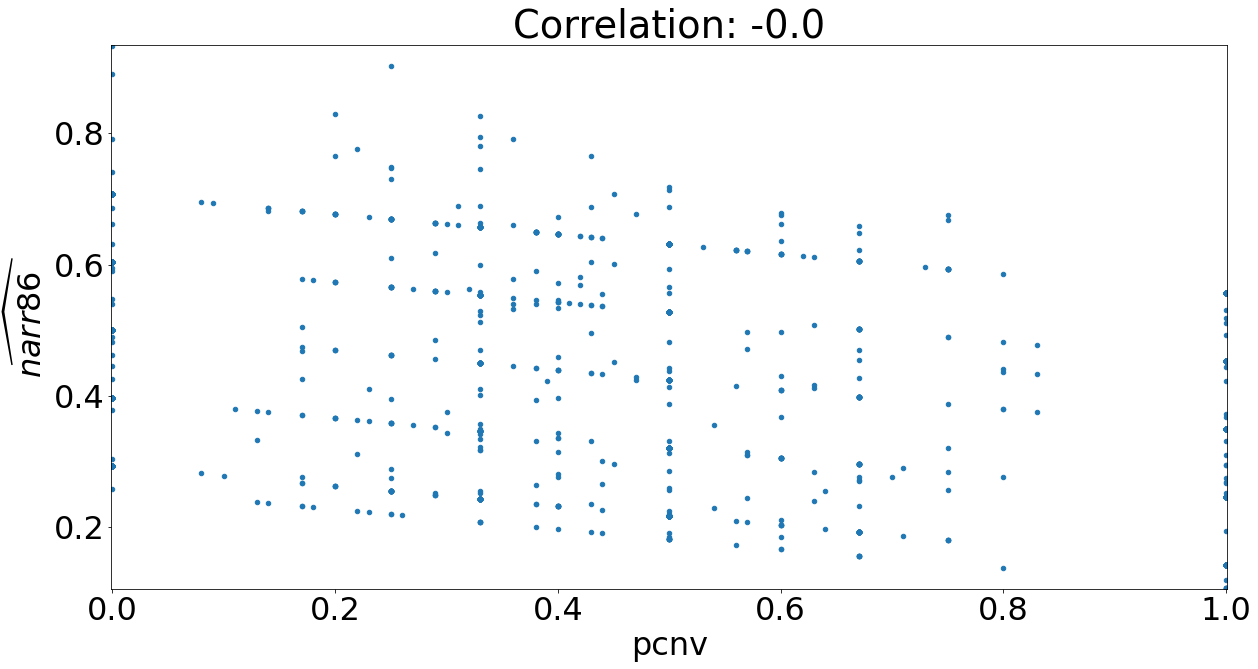

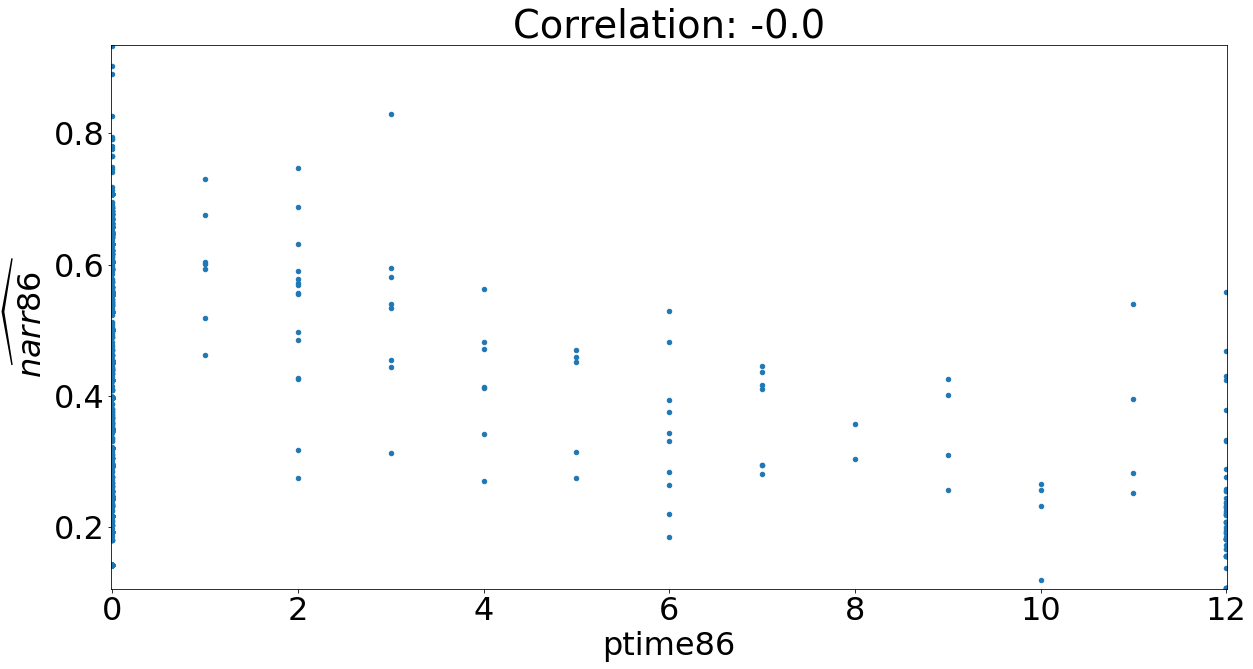

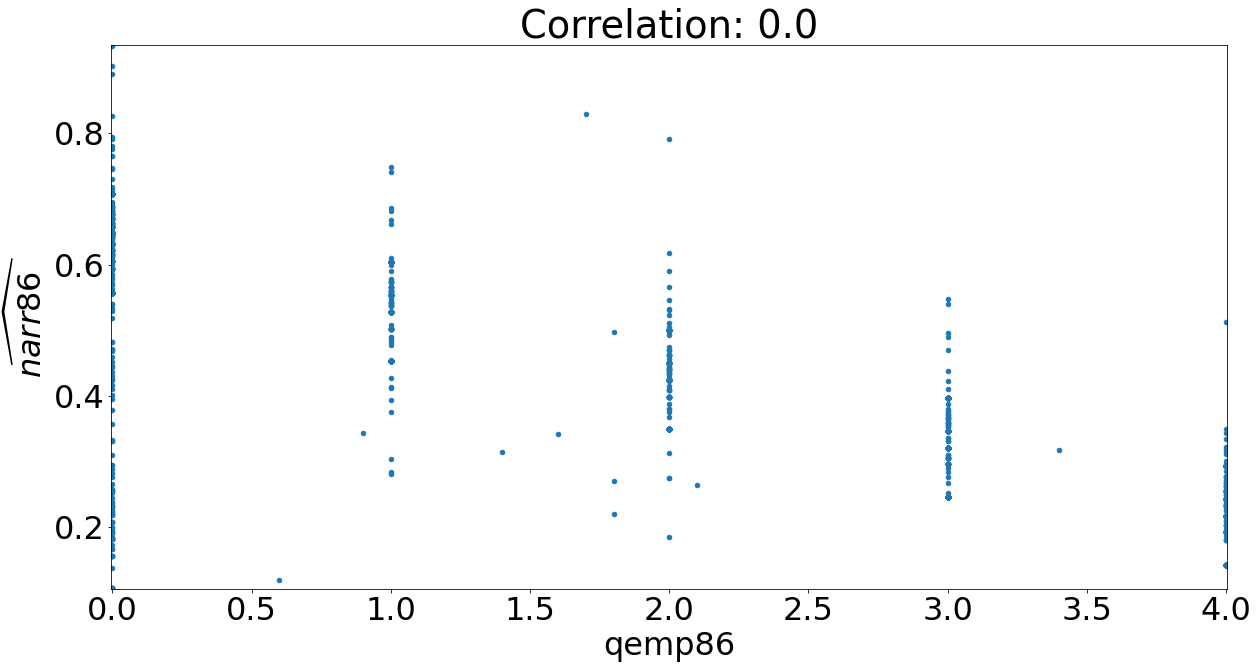

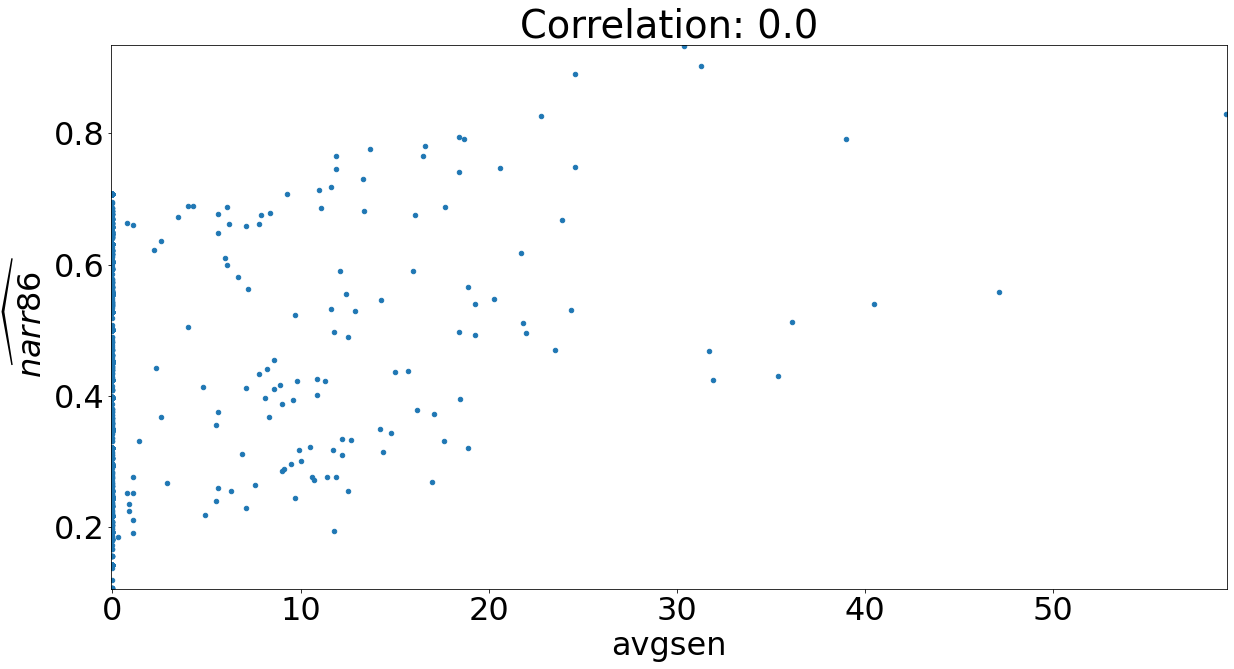

In [17]:
y_name = names[0]
build_estimator(data, results, y_name)
plot_errors(data)

### <center>Gauss-Markov Assumptions</center>

|Assumption No.|Brief Summary|Description|
|---|---|---|
|$MLR.1$| Linear in Parameters: $y = \beta_0 + \beta_1x+u$| In the population model, the dependent variable, $y$, is related to the independent variable, $x$, and the error term, $u$ where $\beta_0$ and $\beta_1$ are the population intercept and slope parameters, respectively.|
|$MLR.2$| Random Sampling of $x$ and $y$ from the Population|We have a random sample of size $n$, ${(x_i,y_i): i = 1,2,...,n}$, following the population model in Assumption MLR.1.|
|$MLR.3$| No Perfect Collinearity | In the sample (and therefore the population), none of the independent variables is constant, and there are no exact _linear_ relationships among the independent variables|
|$MLR.4$| Zero Conditional Mean: $E(u|x_1, x_2, . . . , x_k)=0$|The error $u$ has an expected value of zero given any values of the independent variables|
|$MLR.5$| Homoscedasticity: $Var(u|x_1, x_2, . . . , x_k) = \sigma^2$|The error $u$ has constant variance given any value of the explanatory variables|

### <center>Properties of OLS</center>
|Theorem No.|Summary|Description|
|---|---|---|
|Theorem 3.1|Unbiasedness of OLS| Under $MLR.1-MLR.4$, all parameter estimators are unbiased: $E(\hat{\beta_j})=\beta_j, j=0,1,...,k$|
|Thereom 3.2| Sampling Variances of the OLS Slope Estimators |Under Assumptions $MLR.1-MLR.5$, conditional on the sample values of the independent variables, $Var(\hat{\beta_j})=\frac{\sigma^2}{SST_j(1-R_j^2)'}$, for $j = 1,2, . . ., k$, where $SST_j=\sum_{i=1}^{n}{(x_{ij}-\bar{x_j})^2}$ is the total sample variation in $x_j$, and $R_j^2$ is the $R$-squared from regressing $x_j$ on all other independent variables (and including an intercept). |
|Thereom 3.3| Unbiased Estimation of $\sigma^2$ | Under $MLR.1-MLR.5$, variance of estimator is unbiased: $E(\hat{\sigma}^2) = \sigma^2$|
|Theorem 3.4|Gauss-Markov Theorem|Under Assumptions $MLR.1-MLR.5$, $\hat{\beta_0}$,$\hat{\beta_1}$, ..., $\hat{\beta_k}$ are the __best linear unbiased estimators (BLUEs)__ of $\beta_0$,$\beta_1$, . . . , $\beta_k$, respectively.

## 3.2 OLS in Matrix Form

$$\hat{\beta}=(X'X)^{-1}Xy$$

$$\hat{u} = y - X\hat{\beta}$$

$$\hat{\sigma}^2 = \frac{1}{n-k-1}\hat{u}'\hat{u}$$

$$ \widehat{Var(\hat{\beta})}=\hat{\sigma}^2(X'X)^{-1}$$

In [18]:
def regress(y, X):
    n = len(X.index)
    X_keys = X.keys()
    k = len(X_keys) - 1
    X = np.array(X)
    y = np.array(y)
    b = np.linalg.inv(X.T @ X) @ X.T @ y
    u_hat = y - X @ b
    # transform b to standard numpy array
    b = np.array([x[0] for x in b])
    sigsq_hat = (u_hat.T @ u_hat) / (n - k - 1)
    SER = np.sqrt(sigsq_hat)
    cov_matrix = sigsq_hat * np.linalg.inv(X.T @ X)
    se = np.sqrt(np.diagonal(cov_matrix))
    t_stats = b / se
    results = pd.DataFrame([b, se, t_stats], index = ["$$\\beta$$", "$$SE$$", "$$t$$"], columns =X_keys ).T
    results.index.name = "SER:" + str(round(SER[0][0], 3))

    return results

In [19]:
names = ["colGPA", "hsGPA", "ACT"]
y_name, x_names = names[0], names[1:]
data = gpa1[names]

X, y = build_X_y_matrices(data, names)
regress(y, X)

$$\beta$$    $$SE$$     $$t$$
SER:0.34                                
hsGPA       0.453456  0.095813  4.732722
ACT         0.009426  0.010777  0.874626
Intercept   1.286328  0.340822  3.774191

### Example 3.6

This example is intended to exemplify omitted variable bias. We know that one's performance at work is a function of education, experience, and ability (the example in the book does not mention experience). We also know that the performance of fremales in the workplace is strongly correlated with marital status. Married women tend to have less experience due to time spent raising children. 

Here, we will deviate from the example in the book to consider the correlation between education, experience, number of dependents, and being female. We start with naive correlation.

In [20]:
names = ["wage", "educ", "exper", "tenure","female", "married", "numdep"]
wage1[names].corr()

wage      educ     exper    tenure    female   married    numdep
wage     1.000000  0.405903  0.112903  0.346890 -0.340098  0.228817 -0.053760
educ     0.405903  1.000000 -0.299542 -0.056173 -0.085029  0.068881 -0.215291
exper    0.112903 -0.299542  1.000000  0.499291 -0.041626  0.316984 -0.056319
tenure   0.346890 -0.056173  0.499291  1.000000 -0.197910  0.239889 -0.027037
female  -0.340098 -0.085029 -0.041626 -0.197910  1.000000 -0.166128  0.033148
married  0.228817  0.068881  0.316984  0.239889 -0.166128  1.000000  0.154497
numdep  -0.053760 -0.215291 -0.056319 -0.027037  0.033148  0.154497  1.000000

Being a woman seems to be negatively correlated with every variable under consideration. That is, women have less education, experience, and earn less on average.

However, we can calculate correlations controlling for the impact of other variables. The important aspect here is that we will control for being married when estimating the correlation between being female and other variables. Noticeable, education and experience are now positively associated with being female. However, controlling for all factors, there still appears to be a negative correlation between being female and wages earned.

In [21]:
wage1[names].pcorr()

wage      educ     exper    tenure    female   married    numdep
wage     1.000000  0.437118  0.078188  0.276096 -0.277995  0.069271  0.058300
educ     0.437118  1.000000 -0.368969 -0.045982  0.084614  0.166101 -0.279884
exper    0.078188 -0.368969  1.000000  0.421397  0.099942  0.308348 -0.196419
tenure   0.276096 -0.045982  0.421397  1.000000 -0.095692  0.026505  0.002461
female  -0.277995  0.084614  0.099942 -0.095692  1.000000 -0.115000  0.059650
married  0.069271  0.166101  0.308348  0.026505 -0.115000  1.000000  0.234312
numdep   0.058300 -0.279884 -0.196419  0.002461  0.059650  0.234312  1.000000

#### Now, let's return to the example 3.6

In [22]:
names = ["wage", "educ"]
data = wage1[names]

X, y = build_X_y_matrices(data, names)

reg = sm.OLS(y, X)
results = reg.fit()
OLS_summary(results)

$\beta $      $t$  $$P>|t|$$    $SE$
$$r^2: 0.1648$$                                      
educ               0.5414  10.1667     0.0000  0.0532
Intercept         -0.9049  -1.3210     0.1871  0.6850

Wooldridge notes that the estimate of returns to education when data on ability is not included in the regression will be biased upward on average. The particular estimate of $\hat{\beta} = 0.541$ may not be greater than the the true $\beta$. However, it is more likely than not that the estimate is too high due to omitted variable bias.

Let's compare this result to the earlier regression that we ran, except this time we will not log the value of y.

In [23]:
names = ["wage", "educ", "exper", "tenure"]
data = wage1[names]

X, y = build_X_y_matrices(data, names)

reg = sm.OLS(y, X)
results = reg.fit()
OLS_summary(results)

$\beta $      $t$  $$P>|t|$$    $SE$
$$r^2: 0.3064$$                                      
educ               0.5990  11.6795     0.0000  0.0513
exper              0.0223   1.8528     0.0645  0.0121
tenure             0.1693   7.8204     0.0000  0.0216
Intercept         -2.8727  -3.9408     0.0001  0.7290

||$$Corr(x_1,x_2)>0$$|$$Corr(x_1,x_2)<0$$|
|---|---|---|
|$$\beta_2<0$$|Positive Bias|Negative Bias|
|$$\beta_2>0$$|Negative Bias|Positive Bias|


#### <center> Table 3.2 Summary of Bias in $\tilde{\beta_1}$ When $x_2$ is Omitted in Estimating Equation 3.40

## 3.3 Ceteris Paribus Interpretation and Omitted Variable Bias

$$\hat{y} = \hat{\beta_0} + \hat{\beta_1}x1 + \hat{\beta_2}x2$$

$$\tilde{y} = \tilde{\beta_0} + \tilde{\beta_1}$$ 

$$\tilde{\beta_1}=\hat{\beta_1} + \hat{\beta_2}\tilde{\delta_1}$$

Where:

$$x_2 = \tilde{\delta_0} + \tilde{\delta_1}x_1$$

Using the _gpa1_ dataset, we can estimate $\tilde{\delta_1}$. First, we will estimate:

$$\widehat{colGPA}= \hat{\beta_0} + \hat{\beta_1}ACT + \hat{\beta_2}hsGPA$$

(This is the same regression we estimated when we constructed our own regression function).

In [24]:
names = ["colGPA", "hsGPA", "ACT"]
data = gpa1[names]

X, y = build_X_y_matrices(data, names)

reg = sm.OLS(y, X)
results = reg.fit()
OLS_summary(results)


$\beta $     $t$  $$P>|t|$$    $SE$
$$r^2: 0.1764$$                                     
hsGPA              0.4535  4.7327     0.0000  0.0958
ACT                0.0094  0.8746     0.3833  0.0108
Intercept          1.2863  3.7742     0.0002  0.3408

In [25]:
hsGPA_estimate = results.params["hsGPA"]
ACT_estimate = results.params["ACT"]
hsGPA_estimate, ACT_estimate

(0.4534558853481124, 0.009426012260472766)

Now let's estimate _ACT_ without including _hsGPA_.

In [26]:
names = ["colGPA", "ACT"]
y_name, x_names = names[0], names[1:]
data = gpa1[names]

X, y = build_X_y_matrices(data, names)

reg = sm.OLS(y, X)
results = reg.fit()
OLS_summary(results)



$\beta $     $t$  $$P>|t|$$    $SE$
$$r^2: 0.0427$$                                     
ACT                0.0271  2.4914     0.0139  0.0109
Intercept          2.4030  9.0952     0.0000  0.2642

The estimate for _ACT_ has increased modestly.

In [27]:
bias_ACT_estimate = results.params["ACT"]
bias_ACT_estimate

0.027063973943178415

Finally, let's estimate $\tilde{\delta_1}$, which you can think of as $\tilde{\delta}_{ACT}$, estimated by

$$x_2 = \tilde{\delta_0} + \tilde{\delta_1}x_1$$


In [28]:
names = ["hsGPA", "ACT"]
data = gpa1[names]

X, y = build_X_y_matrices(data, names)

reg = sm.OLS(y, X)
results = reg.fit()
OLS_summary(results)

$\beta $      $t$  $$P>|t|$$    $SE$
$$r^2: 0.1196$$                                      
ACT                0.0389   4.3450        0.0  0.0090
Intercept          2.4625  11.3102        0.0  0.2177

In [29]:
delta1 = results.params["ACT"]
delta1

0.03889675325123457

In [30]:
b1_tilde = ACT_estimate + hsGPA_estimate * delta1
b1_tilde, bias_ACT_estimate

(0.027063973943178405, 0.027063973943178415)

## 3.4 Standard Errors, Multicollinearity, and VIF

$$Var(\hat{\beta_j})=\frac{\sigma^2}{SST_j(1-R_j^2)}=\frac{1}{n}\frac{\sigma^2}{Var(x_j)}\frac{1}{1-R_j^2}$$

where $SST_j=\sum_{i=1}^{n}{(x_{ji}-\bar{x_j}})^2=(n-1)Var(x_j)$ is the total sum of squares and $R_j^2$ is the usual coefficient of determination from a regression of $x_j$ on all of the other regressors.

The variance of $\hat{\beta_j}$ consists of four parts:

- $\frac{1}{n}$: The variance is smaller for larger samples

- $\sigma^2$: The variance is larger if the error term varies a lot, since it introduces randomness into the relationship between the variables of interest

- $\frac{1}{Var(x_j)}$: The variance is smaller if the regressor x_j varies a lot ince this provides relevant information about the relationship

- $\frac{1}{1-R_j^2}$: This variance inflation factor (VIF) accounts for (imperfect) multicolinearity.

Since the error variance $\sigma^2$ is unknown, we replace it with an estimate to come up with an estimated variance of the parameter estimate. Its square root is the standard error

$$se(\hat{\beta_j})=\frac{1}{\sqrt{n}}\frac{\hat{\sigma}}{sd(x_j)}\frac{1}{\sqrt{1-R_j^2}}$$

In [31]:
names = ["colGPA", "hsGPA", "ACT"]
data = gpa1[names]

X, y = build_X_y_matrices(data, names)

reg = sm.OLS(y, X)
results = reg.fit()
# extract SER

SER = np.sqrt(results.mse_resid)

In [32]:
names = names[1:]
# regressing hsGPA on ACT for calculation of R2 and VIF
X_j, y_j = build_X_y_matrices(data, names)

reg_j = sm.OLS(y_j, X_j)
results_j = reg_j.fit()
R2_j = results_j.rsquared
VIF_j = 1 / (1 - R2_j)
"R2_j:", R2_j, "VIF_j:", VIF_j

C:\Users\JLCat\GithubRepositories\OtherRepositories\Wooldridge\supplementaryFunctions.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Intercept"] = 1


('R2_j:', 0.11958147933365049, 'VIF_j:', 1.1358234481972784)

In [33]:
# manual calculation of SE of hsGPA coefficient
n = results.nobs

# sdx is slightlightly different from calculation in text becaues we use pandas instead of directly using np
sdx = data["hsGPA"].std(ddof=1) * np.sqrt((n - 1) / n)
SE_j = 1 / np.sqrt(n) * SER / sdx * np.sqrt(VIF_j)

"SE_j:",SE_j

('SE_j:', 0.09581291608057602)

In [34]:
wage1 = woo.dataWoo("wage1")
names = ["wage", "educ", "exper", "tenure"]
data = wage1[names]

X, y = build_X_y_matrices(data, names)

keys = list(X.keys())
# get VIF
num_X = len(keys)
VIF = {}
for i in range(num_X):
    key = keys[i]
    VIF[key] = [smo.variance_inflation_factor(X.values,i)]

pd.DataFrame(VIF).T.rename(columns = {0:"VIF"})

VIF
educ        1.112771
exper       1.477618
tenure      1.349296
Intercept  29.378903

## Key Terms

Best Linear Unbiased Estimator (BLUE)

Biased Toward Zero

Ceteris Paribus

Conditional Independence

Degrees of Freedom (_df_)

Disturbance

Downward Bias

Endogenous Explanatory Variable

Error Term

Excluding a Relevant Variable

Exogenous Explanatory Variable

Explained Sum of Squares (SSE)

First Order Conditions (FOC)

Frisch-Waugh Theorem

Gauss-Markov Assumptions

Gauss-Markov Theorem

Ignorable Assignment

Inclusion of an Irrelevant Variable

Intercept

Micronumerosity

Misspecification Analysis

Multicollinearity

Multiple Linear Regression (MLR) Model

Multiple Regression Analysis

OLS Intercept Estimate

OLS Regression Line

OLS Slope Estimates

Omitted Variable Bias

Ordinary Least Squares

Overspecifying the Model

Partial Effect

Perfect Collinearity

Population Model

Residual

Residual Sum of Squares

Sample Regression Function (SRF)

Slope Parameters

Standard Deviation of $\hat{\beta_j}$

Standard Error of $\hat{\beta_j}$

Sum of Squared Residuals (SSR)

Total Sum of Squares (SST)

True Model

Unconfounded Assignment

Underspecifying the Model

Upward Bias

Variance Inflation Factor (VIF)